In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


In [3]:
#######input data and splitting into dependent and independent variables
dataset = pd.read_csv('train.csv')
y=dataset.iloc[:,-1].values
x=dataset.iloc[:,:-1].values
dataset_test = pd.read_csv('test.csv')
x_test =dataset_test.iloc[:,:].values
x=x[:,1:]
x=x[:,:-1]
x_test=x_test[:,1:]


In [4]:
####changing categorical data to numeric data by onehoencoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[2])],remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[6])],remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[2])],remainder='passthrough')
x_test=np.array(columnTransformer.fit_transform(x_test))

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[6])],remainder='passthrough')
x_test=np.array(columnTransformer.fit_transform(x_test))



In [7]:
########feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
x_test=sc_x.transform(x_test)
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [11]:
#########splitting data into testing and training set
from sklearn.model_selection import train_test_split
x_train,test_x,y_train,test_y= train_test_split(x,y,test_size=0.2,random_state=0)


In [20]:
###fitting and predicting multivariable linear regression  model and finding Accuracy
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(test_x)
result = regressor.score(x_test,test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 82.57%


In [26]:
##########find accuracy of k fold model ####accuracy of k fold model is reduced 
kfold = model_selection.KFold(n_splits=10)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, x, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 


Accuracy: 80.88%


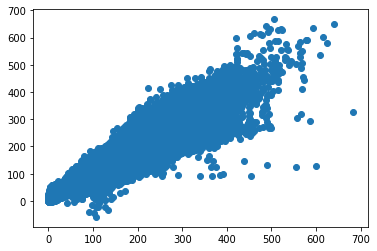

In [33]:
######graph between y(real) and y(predicted)
y_pred=regressor.predict(x)
plt.scatter(y,y_pred)
